In [4]:
!pip install geopandas
!pip install geopy

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim

# **Question 1**
I have imported the data for the map of india on my own from the https://simplemaps.com/data/in-cities website. The link is available as the url of download button.

In our case, we only need the capital cities, and for that purpose I preprocess the data and remove the irrelevant columns that we do not need while removing the cities that do not have the value `"admin"` in the `"capital"` column.


In the end, we are left with the following columns:

1. `"city"` : The name of the capital city
2. `"lat"` : The latitude at which it is located
3. `"lng"` : The longitude at which it is located
4. `"population"` : The actual population of the city
5. `"population_proper"` : The municipal population of the city. Note that it is only available for some big cities, is an estimate that allows us to more accurately represent economic functions of cities, and is always less than `"population_proper"`.

In [13]:
dataframe = pd.read_csv('https://simplemaps.com/static/data/country-cities/in/in.csv')
dataframe = dataframe.loc[dataframe['capital']=='admin'][['city', 'lat', 'lng', 'population', 'population_proper']].reset_index(drop=True)
dataframe.head()

,city,lat,lng,population,population_proper
0,Delhi,28.6600,77.2300,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,11324000.0,6727000.0


# Shapefiles
A shapefile contains the data used for plotting borders of a particular country/group of country/any shape in general. 

In our case, I have downloaded the shapefiles for the map of india from the website above mentioned. The shapefile is called `"india-polygon.shp"`.

# Plotting capitals on India map
Below, I have plotted the capitals on the map of india using a bubble-plot to show the relative populations of the cities on the map of india.

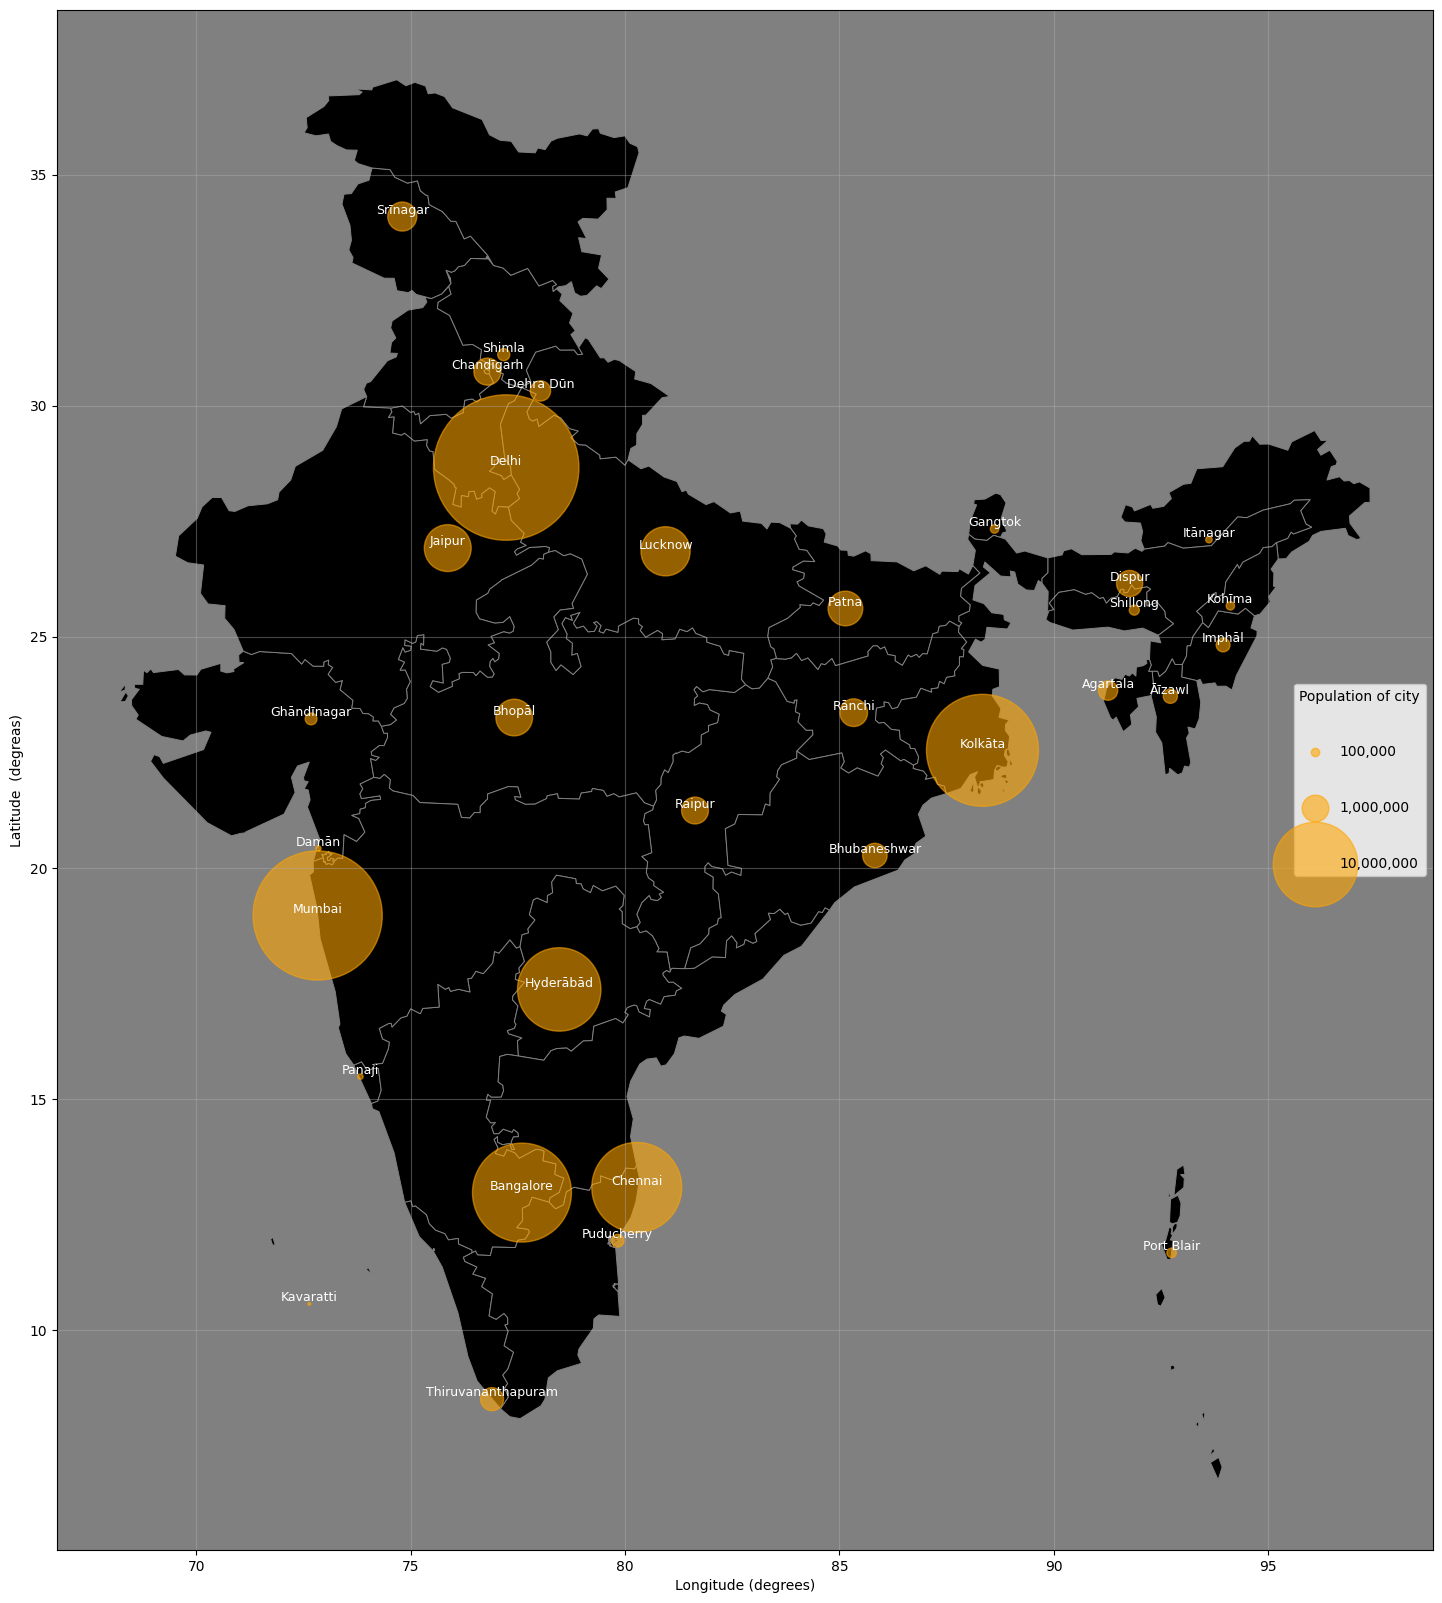

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20, 20])
ax.set_facecolor('grey')
in_map = gpd.read_file('data/india-polygon.shp')
in_map.plot(
    ax=ax,
    color='black',
    edgecolor='grey',
    linewidth=0.7,
)

color_settings = {
    'alpha': 7/12,
    'c': 'orange',
    'marker': 'o',
    # 'edgecolor': 'white',
    # 'linewidths': 3
}

plt.scatter(
    dataframe['lng'],
    dataframe['lat'],
    s=dataframe['population']/2700,
    **color_settings,
)

for itemname, item in zip(['100,000', '1,000,000', '10,000,000'], [100000, 1000000, 10000000]):
    ax.scatter([], [], **color_settings, label=f'{itemname}', s=item / 2700)
    ax.legend()

for xi, yi, zi in dataframe[['city', 'lng', 'lat']].to_numpy():
    plt.annotate(xi, (yi, zi), color='white', fontsize=9, fontfamily='sans-serif', fontstretch='normal', fontweight='light', ha='center', va='bottom')


plt.legend(labelspacing=3, title='Population of city', loc='right')
plt.grid(alpha=0.4)
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude  (degreas)')
plt.show()

# **Question 2**
I have imported the flight data from the link given to us by sir - https://www.flygofirst.com/umbraco/surface/Schedule/Flightscheduledata and plotted the connecting flights between different cities using 

In [140]:
print(pd.read_csv('data/Flight_Schedule_Data.csv')['Origin'].unique())

['Abu Dhabi' 'Ahmedabad' 'Amritsar' 'Bagdogra' 'Bangkok' 'Bengaluru'
 'Chandigarh' 'Chennai' 'Dammam' 'Dehra Dun' 'Delhi' 'Dubai' 'Goa'
 'Goa-New Goa' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jammu' 'Jeddah' 'Kannur'
 'Kochi' 'Kolkata' 'Kuwait' 'Leh' 'Lucknow' 'Mumbai' 'Muscat' 'Nagpur'
 'Patna' 'Phuket' 'Port Blair' 'Pune' 'Ranchi' 'Srinagar' 'Thoise'
 'Varanasi']


In [206]:
flights = pd.read_csv('data/Flight_Schedule_Data.csv')[['Origin', 'Destination']]
flights['Source'] = flights['Origin']
city_list = np.unique(list(flights['Source']) + list(flights['Destination']))
dataframe = pd.read_csv('https://simplemaps.com/static/data/country-cities/in/in.csv')
dataframe = dataframe[['city', 'lat', 'lng', 'population', 'population_proper']].reset_index(drop=True)
print(dataframe.shape)

(406, 5)


In [224]:
in_map = gpd.read_file('data/india-polygon.shp')

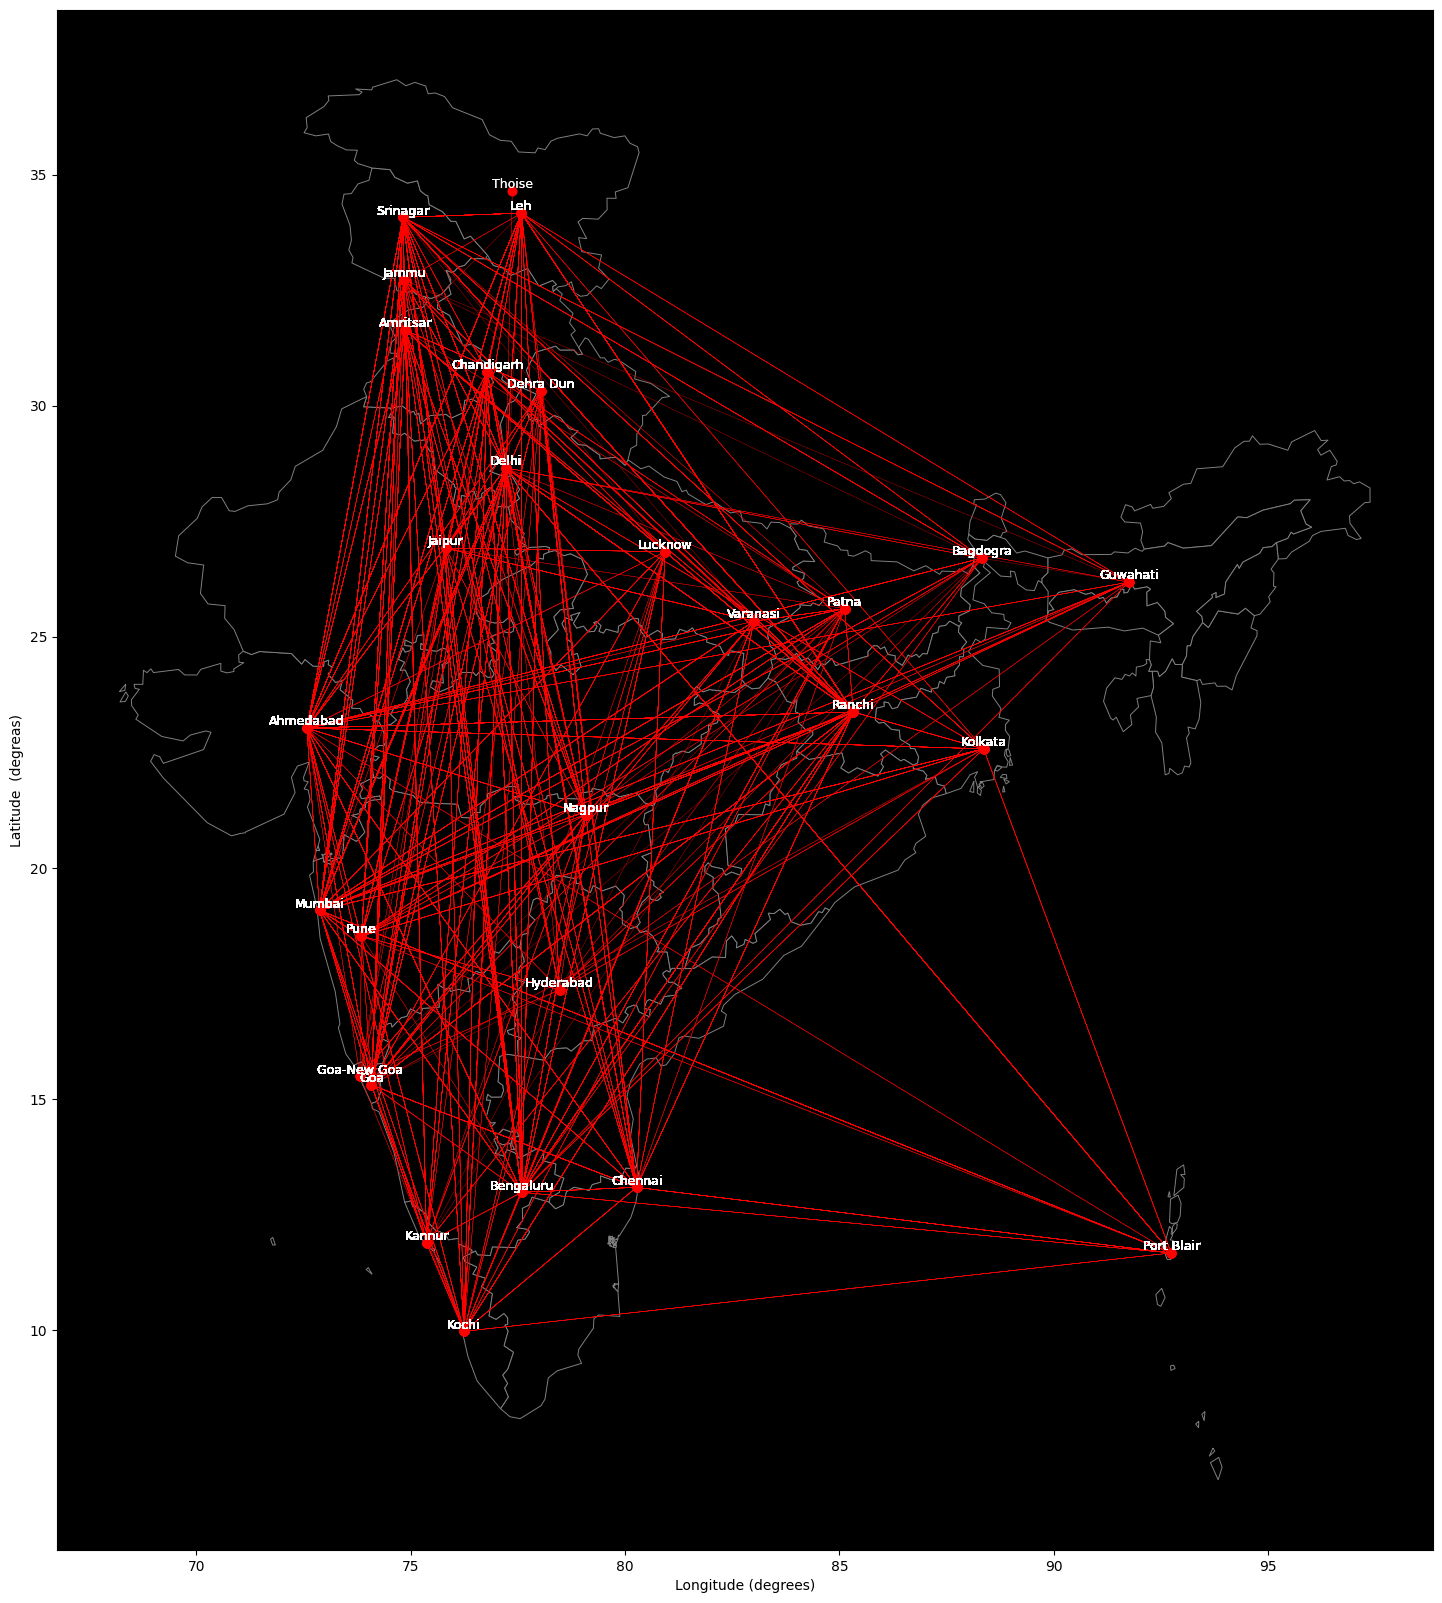

In [237]:
# print(flights.shape, flights['Flight_Count'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20, 20])
ax.set_facecolor('black')

in_map.plot(
    ax=ax,
    color='black',
    edgecolor='grey',
    linewidth=0.7,
)

color_settings = {
    'alpha': 1,
    'c': 'orange',
    'marker': '^',
    # 'edgecolor': 'white',
    # 'linewidths': 3
}


city_locs = {}
geolocator = Nominatim(user_agent='ishaan')
for city in flights['Origin'].unique():
    location = geolocator.geocode(city)
    if (max(6, min(37, location.latitude)) == location.latitude) and (max(69, min(97, location.longitude)) == location.longitude):
        city_locs[city] = [location.longitude, location.latitude]


# plt.scatter(
#     dataframe[[dataframe['city'][id] in city_locs for id in range(dataframe.shape[0])]]['lng'],
#     dataframe[[dataframe['city'][id] in city_locs for id in range(dataframe.shape[0])]]['lat'],
#     s=100,
#     **color_settings,
# )

# print("City locations:", city_locs)
# for xi, yi, zi in dataframe[['city', 'lng', 'lat']].to_numpy():
#     city_locs[xi.lower()] = [yi, zi]
    # plt.annotate(xi, (yi, zi), color='white', fontsize=9, fontfamily='sans-serif', fontstretch='normal', fontweight='light', ha='center', va='bottom')
# print(len(city_locs))
# for city1, city2, city3 in flights.to_numpy():
#     if city2 == 'Guwahati':
#         print(city1, city2)
for count, city1, city2 in flights.to_numpy():
    if city1 in city_locs and city2 in city_locs:
        longitude1, latitude1 = city_locs[city1]
        longitude2, latitude2 = city_locs[city2]
        x = [longitude1, longitude2]
        y = [latitude1,  latitude2 ]
        plt.plot(x, y, 'ro-', linewidth=0.25, )
        plt.annotate(city1, (x[0], y[0]), color='white', fontsize=9, fontfamily='sans-serif', fontstretch='normal', fontweight='light', ha='center', va='bottom')
        plt.annotate(city2, (x[1], y[1]), color='white', fontsize=9, fontfamily='sans-serif', fontstretch='normal', fontweight='light', ha='center', va='bottom')
    else:
        # print(city1 in city_locs, city2 in city_locs, city1, city2)
        pass

# plt.grid(alpha=0.4)
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude  (degreas)')
plt.show()